### 소상공인시장진흥공단 상가업소정보로 스타벅스, 이디야 위치 분석

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

In [ ]:
df = pd.read_csv("상가업소정보_201912_01.csv", sep='|')
n = df.isnull().sum()
not_use = n.sort_values(ascending=False).head(9)
not_use_col = not_use.index
df = df.drop(not_use_col, axis=1)
cols = df.columns
cols_code = cols[cols.str.contains("코드|번호")]
df = df.drop(cols_code, axis=1)
df = df.drop(['대지구분명','지번본번지','지번주소','도로명','건물본번지'],axis=1)
df_seoul = df[df["시도명"] == "서울특별시"]
df_seoul.head(2)

In [ ]:
df_file = pd.read_csv("seoul_open_store.csv")
df_file.head(2)

In [ ]:
# 문자열의 소문자로 변경하는 메소드를 사용합니다.
# "상호명_소문자" 컬럼을 만듭니다.
df_file["상호명_소문자"] = df_file["상호명"].str.lower()

In [ ]:
df_cafe = df_file[ df_file["상호명_소문자"].str.\
                   contains('스타벅스|starbucks|이디야|이디아|ediya')]

In [ ]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'),\
                                                    "브랜드명"] = "스타벅스"
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'),\
                                                    "브랜드명"] = "이디야"

In [ ]:
df_cafe["상권업종대분류명"].value_counts()

In [ ]:
df_cafe[ df_cafe['상권업종대분류명']=='생활서비스']

In [ ]:
df_cafe[ df_cafe['상권업종대분류명']=='학문/교육']

In [ ]:
df_cafe[ df_cafe['상권업종대분류명']=='소매']

In [ ]:
df_cafe[ df_cafe['상권업종대분류명']=='부동산']

In [68]:
df_cafe = df_cafe[~df_cafe["상권업종대분류명"].\
                  isin(["생활서비스", "학문/교육", "소매", '부동산'])]

<AxesSubplot:>

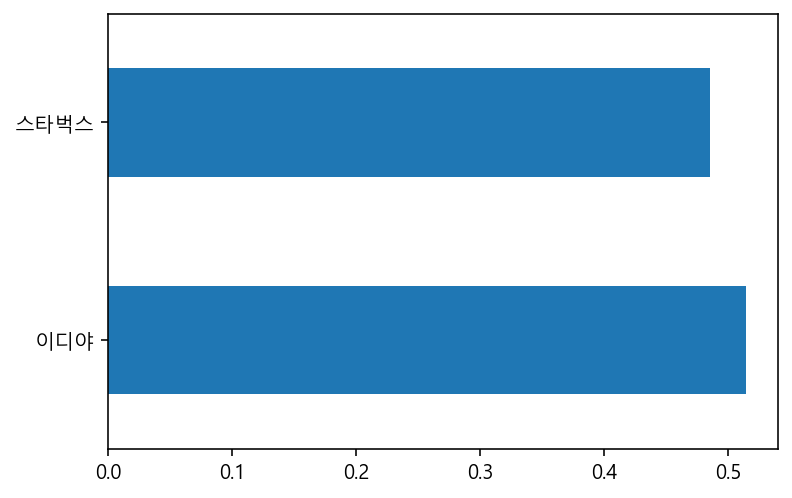

In [69]:
df_cafe["브랜드명"].value_counts(normalize=True).plot.barh()

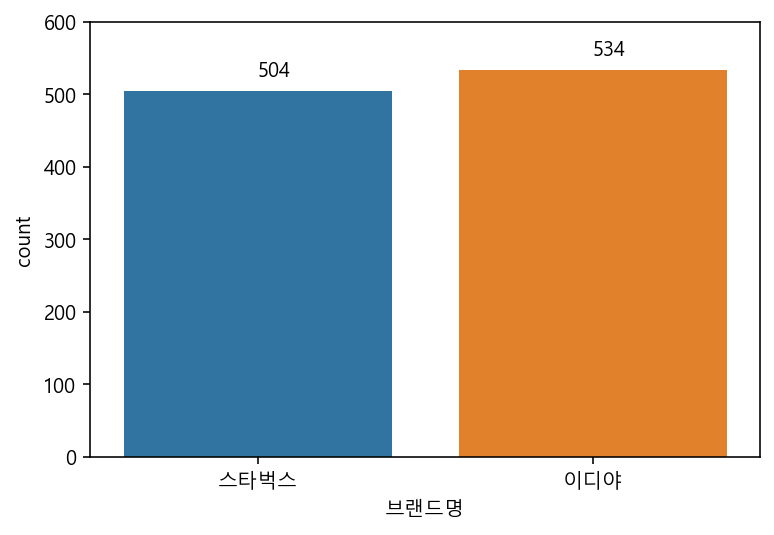

In [86]:
# seaborn 의 countplot 을 이용하여 브랜드별 매장 갯수를 표하하고
# text 를 이용하여 실제 매장 갯수를 차트 위, 해당 위치에 표시하세요
import numpy as np
brand_count = df_cafe["브랜드명"].value_counts().sort_values()
g = sns.countplot(data=df_cafe, x="브랜드명")
g.set_yticks(np.arange(0, 700, 100))
for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i]+20, s=brand_count[i])

In [59]:
brand_count

이디야     534
스타벅스    504
Name: 브랜드명, dtype: int64

In [77]:
df_cafe.groupby('브랜드명').size()

브랜드명
스타벅스    504
이디야     534
dtype: int64

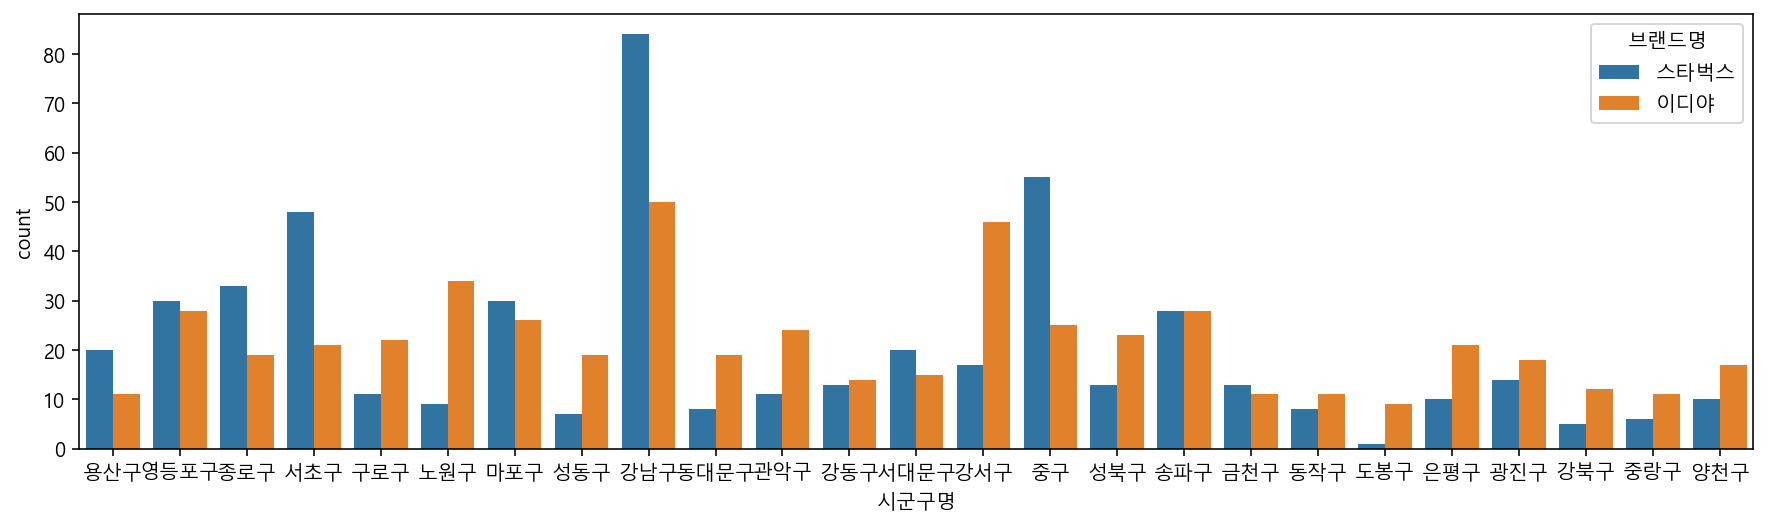

In [67]:
# 시군구명으로 빈도수를 세고 브랜드명별로 막대가 쪼개진 countplot 을 표시하세요.
plt.figure(figsize=(15,4))
g = sns.countplot(data=df_cafe, x = "시군구명", hue = "브랜드명")

<AxesSubplot:xlabel='경도', ylabel='위도'>

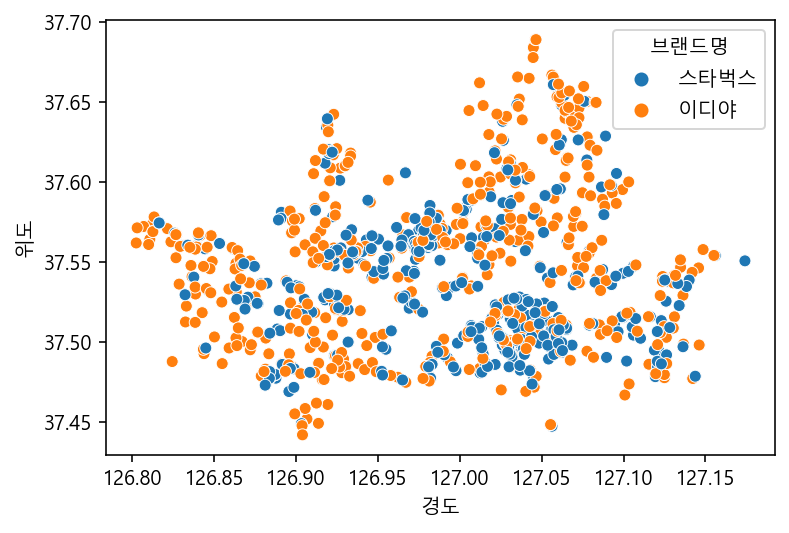

In [71]:
# seaborn의 scatterplot 으로 hue에 브랜드명을 지정해서 시각화 합니다.
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue="브랜드명")

* df_cafe 의 위도값들과 경도값들을 이용하여 모두 마킹해주세요
* tooltip 값은 브랜드명-도로명주소 로 설정합니다
* zoom_start 는 12 또는 11 중 적절히 설정하세요
* 이디야 빨간색, 스타벅스는 파란색으로 마킹하세요
* radius 값은 생략하고, MarkerCluster 를 이용하여 표시해주세요

In [83]:
import folium
from folium.plugins import MarkerCluster
lat = df_cafe["위도"].mean()
long = df_cafe["경도"].mean()
m = folium.Map([lat, long], zoom_start=12, tiles="Stamen Toner")

marker_cluster = MarkerCluster().add_to(m)

for i in df_cafe.index:
    sub_lat = df_cafe.loc[i, "위도"]
    sub_long = df_cafe.loc[i, "경도"]
    title = df_cafe.loc[i, "상호명"] + " - " + df_cafe.loc[i, "도로명주소"]
    icon_color = "blue"
    if df_cafe.loc[i, "브랜드명"] == "이디야":
        icon_color = "red"
    folium.Marker(
        [sub_lat, sub_long],  icon=folium.Icon(color=icon_color),
        tooltip=title).add_to(marker_cluster)
m

#### GeoJSON 파일로드
* 구별로 매장수를 표현하기 위해 GeoJSON 파일 로드
    * 파일출처 : (https://github.com/southkorea/seoul-maps)
    * 다운로드가 가능한 주소 :
    * https://drive.google.com/open?id=13j8-_XLdPe0pptsqu8-uyE-0Ym6V2jw5

In [88]:
# 구별, 브랜드별 점포수를  groupby 를 이용하여 계산하고
# df_cafe_vw 변수에 저장합니다
df_cafe_vs = df_cafe.groupby(["시군구명", "브랜드명"])["상호명"].count()
df_cafe_vs

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
      이디야     14
강북구   스타벅스     5
      이디야     12
강서구   스타벅스    17
      이디야     46
관악구   스타벅스    11
      이디야     24
광진구   스타벅스    14
      이디야     18
구로구   스타벅스    11
      이디야     22
금천구   스타벅스    13
      이디야     11
노원구   스타벅스     9
      이디야     34
도봉구   스타벅스     1
      이디야      9
동대문구  스타벅스     8
      이디야     19
동작구   스타벅스     8
      이디야     11
마포구   스타벅스    30
      이디야     26
서대문구  스타벅스    20
      이디야     15
서초구   스타벅스    48
      이디야     21
성동구   스타벅스     7
      이디야     19
성북구   스타벅스    13
      이디야     23
송파구   스타벅스    28
      이디야     28
양천구   스타벅스    10
      이디야     17
영등포구  스타벅스    30
      이디야     28
용산구   스타벅스    20
      이디야     11
은평구   스타벅스    10
      이디야     21
종로구   스타벅스    33
      이디야     19
중구    스타벅스    55
      이디야     25
중랑구   스타벅스     6
      이디야     11
Name: 상호명, dtype: int64

In [89]:
df_cafe_vs = df_cafe_vs.reset_index()
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [94]:
# 서울의 행정구역 경계를 GeoJSON으로 표현한 파일입니다. 
# 이 파일을 불러와 구별 스타벅스와 이디야의 매장수를 표현합니다.
geo_path = 'seoul_municipalities_geo_simple.json'

import json
geo_json = json.load(open(geo_path, encoding="utf-8"))
geo_json["features"][0]['properties']["name"]

'강동구'

In [95]:
# df_cafe_vs 변수에 담긴 값을 통해 스타벅스의 매장 수를 구합니다.
# "브랜드명"컬럼으로 스타벅스만 가져옵니다.
df_star = df_cafe_vs[df_cafe_vs["브랜드명"] == "스타벅스"]
df_star.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
2,강동구,스타벅스,13
4,강북구,스타벅스,5
6,강서구,스타벅스,17
8,관악구,스타벅스,11


In [99]:
m = folium.Map([lat, long])

In [100]:
folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_star,
    columns=['시군구명', '상호명'],
    key_on='feature.properties.name',   # geo_json 의 필드명
    fill_color='YlGn',   # 표현 색상
    fill_opacity=0.7,   # 면색의 투명도
    line_opacity=0.2,   #  선색의 투명도
    legend_name='스타벅스 매장수'
).add_to(m)
m

In [102]:
df_ediya = df_cafe_vs[df_cafe_vs["브랜드명"] == "이디야"]
m = folium.Map([lat, long])

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_ediya,
    columns=['시군구명', '상호명'],
    key_on='feature.properties.name',
    fill_color='Blues',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='이디야 매장수'
).add_to(m)
m

In [105]:
df_vs = df_cafe_vs.pivot(index="시군구명", columns="브랜드명", values="상호명")
df_vs["매장수비교"] = df_vs["스타벅스"] - df_vs["이디야"] > 0
df_vs["매장수비교"] = df_vs["매장수비교"].astype(float)
df_vs.head()

브랜드명,스타벅스,이디야,매장수비교
시군구명,,,
강남구,84,50,True
강동구,13,14,False
강북구,5,12,False
강서구,17,46,False
관악구,11,24,False


In [106]:
# 구를 컬럼명으로 사용하기 위해 reset_index 를 합니다.
# 데이터 프레임을 df_vs 에 저장합니다.
df_vs = df_vs.reset_index()
df_vs.head()

브랜드명,시군구명,스타벅스,이디야,매장수비교
0,강남구,84,50,True
1,강동구,13,14,False
2,강북구,5,12,False
3,강서구,17,46,False
4,관악구,11,24,False


In [107]:
m = folium.Map([lat, long], tiles='stamen toner')

folium.Choropleth(
    geo_data=geo_json,
    name='choropleth',
    data=df_vs,
    columns=['시군구명', '매장수비교'],
    key_on='feature.properties.name',
    fill_color='BuGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='매장수 비교'
).add_to(m)

m

<__array_function__ internals>:5: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
